In "MachineLearning-p3.pptx" in Canvas modules I fount that regression algorithms works well with contunous values. Since the stock market values are conrious this is a good choice for us. We're going linear for it's simplicity.

So to sum it up, we choose linear regression!

First the required Imports

In [271]:
import pandas as pd                                     # Pandas 
from sklearn.linear_model import LinearRegression       # lab 4, as it says -> linear regression models
from sklearn.model_selection import train_test_split    # lab 4, train_split function does the dividing of the data into training and testing
from sklearn import metrics                             # lab 4, calculate preformance
import matplotlib.pyplot as plt                         # Not needed, but added for fun, for a scatterplot

The actual code doing the reading, making the datasets, making the model and running the test.

In [272]:
TSLA_data = pd.read_csv('TSLA.csv')                                                                     # Reads the data file
X = TSLA_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]                                           # Desigating data to X
Close = TSLA_data['Close']                                                                              # only close goes to y as we want to predict this, it is the price at the end of each day
X_train, X_test, Close_train, Close_test = train_test_split(X, Close, test_size=0.25, random_state=0)   # Dividing training and testing data sets, and deciding test_size


model = LinearRegression()                                                                              # Making our model 
model.fit(X_train, Close_train)                                                                         # Training our model
Close_prediction = model.predict(X_test)                                                                # Using our model (to predict)

df = pd.DataFrame({'Actual': Close_test, 'Predicted': Close_prediction})                                # Make a dataframe with the test results                     
sorted_df = df.sort_index()                                                                             # Sort the test results
print(sorted_df.to_string)                                                                              # Print the test results

<bound method DataFrame.to_string of          Actual   Predicted
5    191.300003  191.300003
7    190.720001  190.720001
8    195.970001  195.970001
12   183.169998  183.169998
15   169.910004  169.910004
..          ...         ...
229  251.600006  251.600006
231  261.160004  261.160004
232  260.049988  260.049988
238  251.119995  251.119995
245  216.520004  216.520004

[63 rows x 2 columns]>


For FUN ! Visualizing the accuracy of the prediction

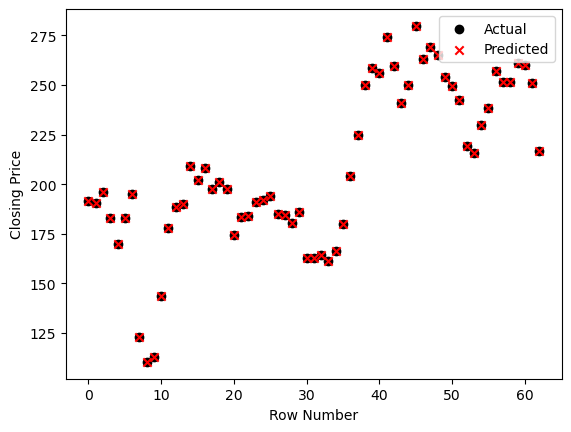

In [273]:
plt.scatter(range(len(sorted_df)), sorted_df['Actual'], color='black', label='Actual', marker='o')      # Plots the actual closing price as black circles
plt.scatter(range(len(sorted_df)), sorted_df['Predicted'], color='red', label='Predicted', marker='x')  # Plots the predicted closing price as red X's
plt.xlabel('Row Number')                                                                                # Labels y axis
plt.ylabel('Closing Price')                                                                             # Labels x axis
plt.legend()                                                                                            # Displays box showing actual and predicted as O and X
plt.show()                                                                                              # Shows our plot

Find the prediction percentage score.
1.0 is perfect

In [274]:
print("Prediction score % = " + str(model.score(X_test, Close_test)))               # Find and print the prosent prediction score

Prediction score % = 1.0


Test how well the model works, by checking squared error.
The lower the error the more actcurate the results
(See lab 4)

In [275]:
print( "MAE = " + str(metrics.mean_squared_error(Close_test, Close_prediction)))    # Find and print mean squared error

MAE = 4.262184835915096e-19
